## 哈希表

哈希表理论基础：

哈希表用来快速判断一个元素是否在集合里

哈希函数就是映射到对应的索引下标

如果映射到了同一个索引下标就是哈希碰撞 解决方法：拉链法、线性探测法

拉链法：冲突元素存储在链表当中 可以通过索引寻找

线性探测法：确保tablesize大于datasize  利用空置位置存放冲突数据

常见三种哈希结构：1.数组 2.集合（set）3.映射（map）

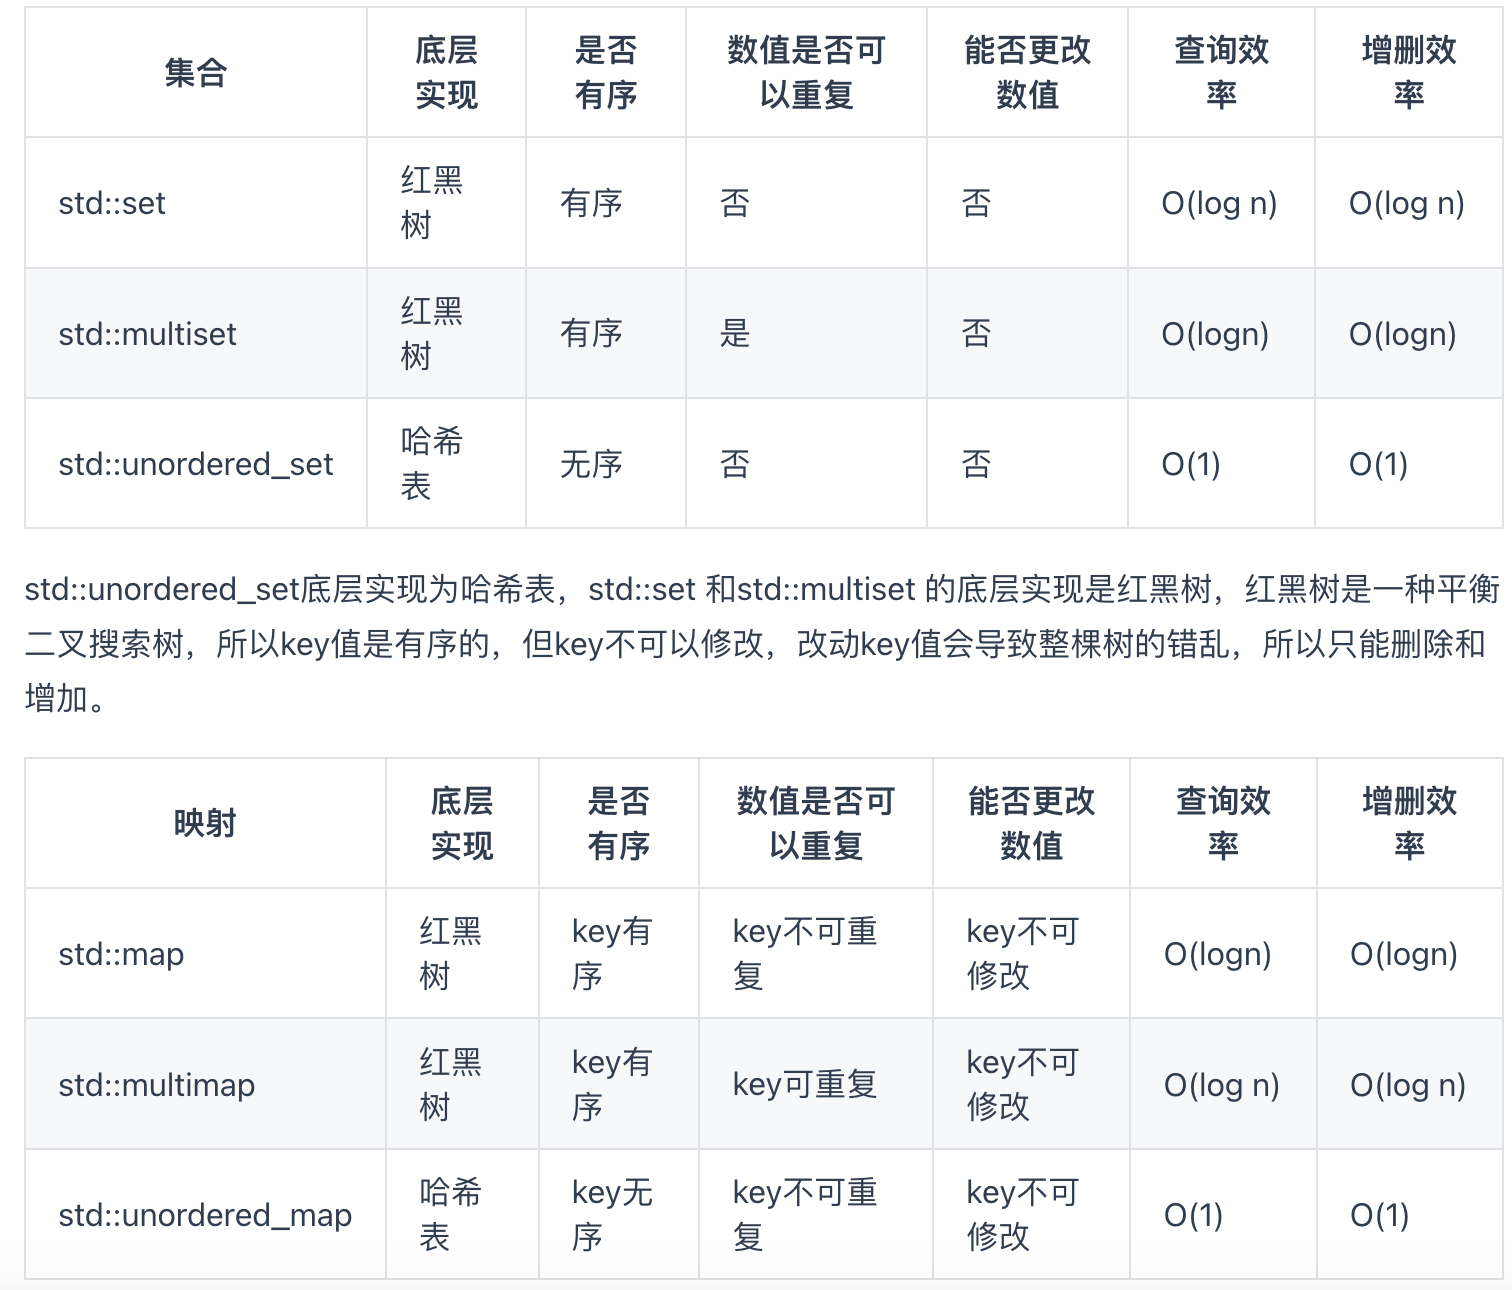

unordered_低层实现是哈希表 std:: 是红黑树

### 有效的字母异位符

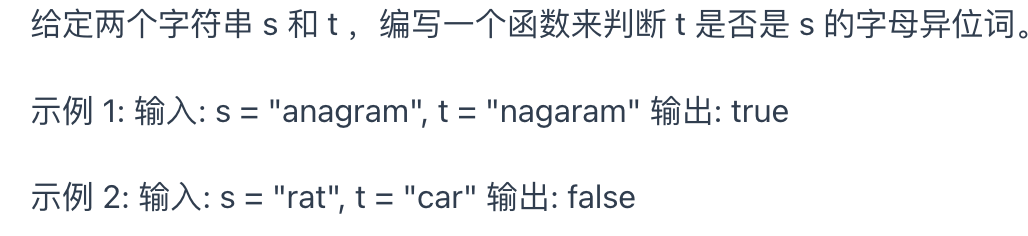

可以有两种解法：

1.暴力解法：通过两层for循环记录字母 判断是否重复出现 复杂度为O（n**2）

2.哈希函数：可以变换为判断一个数组是否在集合当中

In [ ]:
class Solution(object):
    def isAnagram(self, s, t):
        """
        :type s: str
        :type t: str
        :rtype: bool
        """
        record = [0] * 26  # 构建字母空列表
        for i in s:
            record[ord(i) - ord('a')] += 1  # ASCII数值
        for i in t:
            record[ord(i) - ord('a')] -= 1  # ASCII数值

        for i in range(26):
            if record[i] != 0:
                return False
        return True
                

### 两个数组的交集

数组做哈希的题目，限制数值大小，如果哈希值比较少、特别分散、跨度非常大，使用数组就造成空间的极大浪费

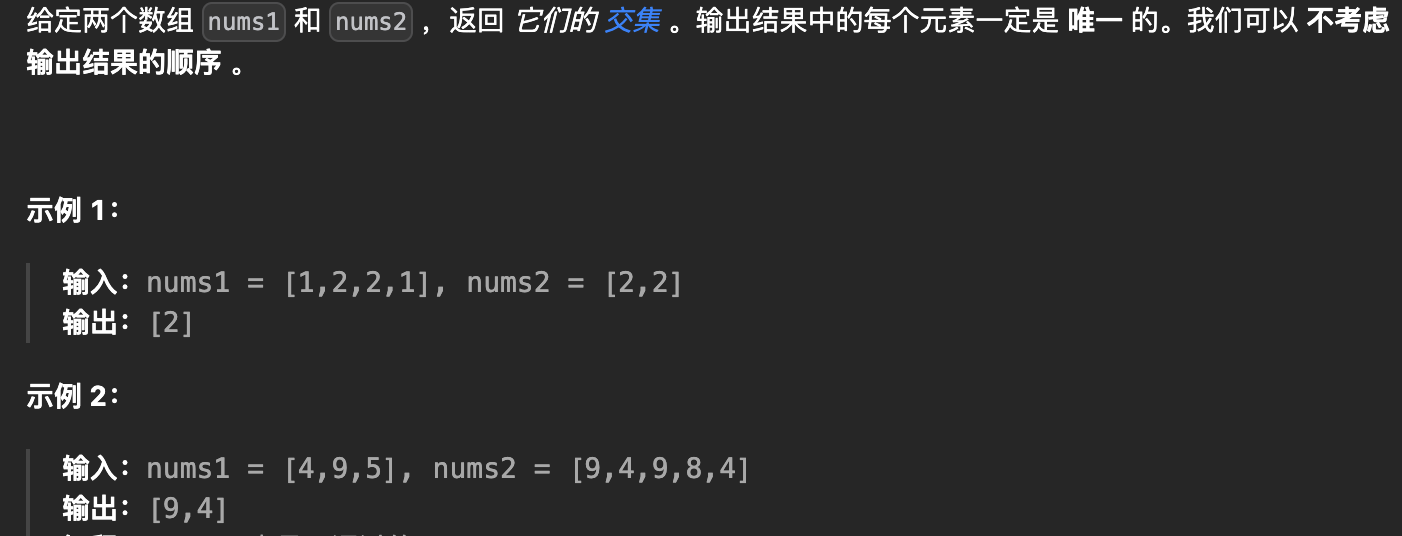

In [ ]:
class Solution(object):
    def intersection(self, nums1, nums2):
        """
        :type nums1: List[int]
        :type nums2: List[int]
        :rtype: List[int]
        """
        table = {}
        for num in nums1:
            table[num] = table.get(num, 0) + 1

        res = set()
        for num in nums2:
            if num in table:
                res.add(num) # set是用add
                del table[num]
        return list(res)  # 转换成list数组

### 快乐数

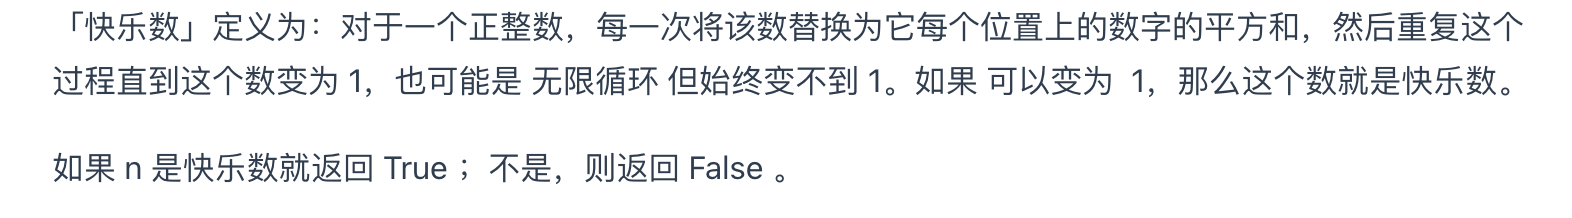

思路： 对每一个数字进行遍历计算生成新数字-存入set中，如果set中存在（无限循环）则break-若最后成1返回True

In [ ]:
class Solution(object):
    def isHappy(self, n):
        """
        :type n: int
        :rtype: bool
        """
        table = {} # 生成set
        
        while n != 1:
            result = 0
            for i in str(n): #
                result += (int(i) ** 2)  # 强制类型转换 str转换成int
                
            if result in table:#
                return False
            else:
                table[result] = 1
            n = result
        return True

### 两数之和

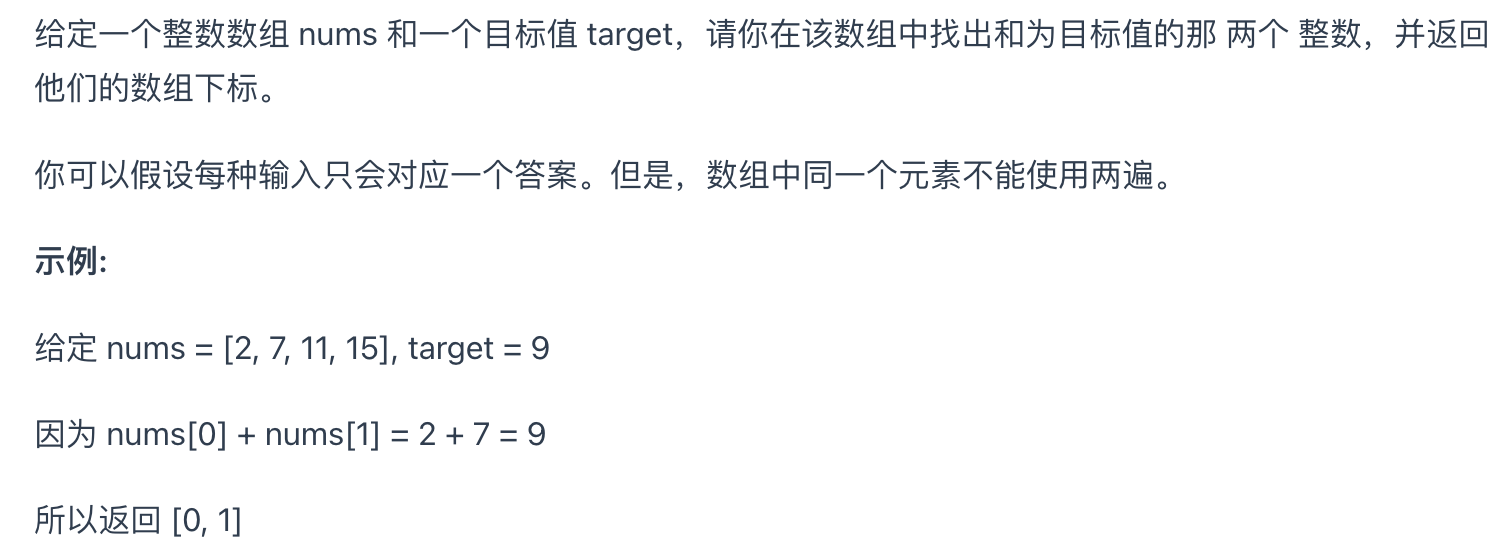

思路：目标是找到target以及他所对应的index，因此考虑用dict字典类型，利用enumerate分解nums为index和value，value作为dict的键
     查找是否存在，不再就加入到dict中

In [ ]:
class Solution(object):
    def twoSum(self, nums, target):
        """
        :type nums: List[int]
        :type target: int
        :rtype: List[int]
        """
        record = dict()

        for index, value in enumerate(nums):
            if target - value in record:
                return [record[target-value], index]
            record[value] = index
        return []
        